# Business Understanding

# Data Understanding

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vogeldata = pd.read_csv('Data/Dataset1/birds.csv')

In [284]:
vogeldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gen            500 non-null    object 
 1   sp             500 non-null    object 
 2   ssp            17 non-null     object 
 3   grp            500 non-null    object 
 4   en             500 non-null    object 
 5   rec            500 non-null    object 
 6   cnt            500 non-null    object 
 7   loc            500 non-null    object 
 8   lat            498 non-null    float64
 9   lon            498 non-null    float64
 10  alt            484 non-null    object 
 11  type           499 non-null    object 
 12  sex            128 non-null    object 
 13  stage          140 non-null    object 
 14  method         500 non-null    object 
 15  url            500 non-null    object 
 16  file           500 non-null    object 
 17  file-name      500 non-null    object 
 18  length    

**Gen**: Genus van de vogel (wetenschappelijke naam) \
**Sp**: Soort van de vogel. \
**Ssp**: Subsoort van de vogel. \
**Grp**: Welk soort dier het is. \
**En**: Engelse naam van de vogel. \
**Rec**: Naam van de persoon die het geluid heeft opgenomen. \
**Cnt**: Land waar het is opgenomen. \
**Loc**: Locatie van waar het geluid is opgenomen. \
**Lat**: De latitude (breedtegraad) \
**Lon**: De longitude (lengtegraad) \
**Method**: Methode hoe het geluid is opgenomen. \
**Url**: Url van de opnamepagina. \
**File**: Download link voor het geluid. \
**File-name**: Naam van de file. \
**Length**: Duur van de opname. \
**Date**: Datum van opname. \
**Uploaded**: Datum wanneer het geluid is geupload. \
**Animal seen**: Hier wordt antwoord gegeven op de vraag of de Opnemer de vogel heeft gezien. \
**Playback-used**: Hier wordt antwoord gegeven op de vraag of er is geplaybacked. \
**q**: Kwaliteit van de opname. Dit gaat van A tot E, waarbij A het beste is.  

In [285]:
vogeldata.head(2)

,gen,sp,ssp,grp,en,rec,cnt,loc,lat,lon,...,method,url,file,file-name,length,date,uploaded,animal-seen,playback-used,q
0,Gallinago,gallinago,NaN,birds,Common Snipe,Gosse Hoekstra,Netherlands,"Tzummarum, Waadhoeke, Friesland",53.2602,5.5326,...,field recording,//xeno-canto.org/843222,https://xeno-canto.org/843222/download,XC843222-CS-221123-08H25M.mp3,0:24,2023-11-22,2023-11-22,yes,no,B
1,Gallinago,gallinago,NaN,birds,Common Snipe,Michel Veldt,Netherlands,"Bodegraven, Bodegraven-Reeuwijk, Zuid-Holland",52.0747,4.7632,...,field recording,//xeno-canto.org/771007,https://xeno-canto.org/771007/download,XC771007-Watersnip-roep---Bodegraven---2022-10...,0:19,2022-10-17,2022-12-23,no,no,B


In [286]:
vogeldata.columns

Index(['gen', 'sp', 'ssp', 'grp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lon',
       'alt', 'type', 'sex', 'stage', 'method', 'url', 'file', 'file-name',
       'length', 'date', 'uploaded', 'animal-seen', 'playback-used', 'q'],
      dtype='object')

In [287]:
rijen, kolommen = vogeldata.shape

print(f"Aantal rijen: {rijen}")
print(f"Aantal kolommen: {kolommen}")

Aantal rijen: 500
Aantal kolommen: 24


In [288]:
NULL = vogeldata.isnull().sum()
print("Aantal NULL:\n", NULL)

Aantal NULL:
 gen                0
sp                 0
ssp              483
grp                0
en                 0
rec                0
cnt                0
loc                0
lat                2
lon                2
alt               16
type               1
sex              372
stage            360
method             0
url                0
file               0
file-name          0
length             0
date               0
uploaded           0
animal-seen        0
playback-used      0
q                  0
dtype: int64


In [289]:
dubbele_rijen = vogeldata[vogeldata.duplicated()]
print(f"Aantal dubbele rijen: {len(dubbele_rijen)}")

Aantal dubbele rijen: 0


In [290]:
numerical_columns = vogeldata.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = vogeldata.select_dtypes(include=['object']).columns

Data_types_summary = {
    'Numeriek': numerical_columns.tolist(),
    'Categorisch': categorical_columns.tolist(),
}

for data_type, columns in Data_types_summary.items():
    print(f"{data_type} kolommen: {columns}")

Numeriek kolommen: ['lat', 'lon']
Categorisch kolommen: ['gen', 'sp', 'ssp', 'grp', 'en', 'rec', 'cnt', 'loc', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file', 'file-name', 'length', 'date', 'uploaded', 'animal-seen', 'playback-used', 'q']


# Importeren benodigde libraries

In [291]:
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from scipy.signal import stft
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

# Data Preparation

## Vogeldata uitlezen

In [292]:
vogelkopie = vogeldata[['url', 'file', 'file-name']].copy()

vogelkopie.count()

url          500
file         500
file-name    500
dtype: int64

In [293]:
import requests
import os

# user confirmation
proceed = input("Do you want to download all audio files? (yes/no): ")
if proceed.lower() == "yes":
    output_dir = "audio_files"
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over each row in the DataFrame
    for index, row in vogelkopie.iterrows():
        audio_file = row['file']  # Get the audio file URL
        file_name = row['file-name']  # Get the file name

        # Define the full path to save the file
        file_path = os.path.join(output_dir, file_name)

        try:
            # Download the audio file
            response = requests.get(audio_file, stream=True)
            response.raise_for_status()  # Raise an error for bad responses

            # Save the file locally
            with open(file_path, 'wb') as audio_file:
                audio_file.write(response.content)

            print(f"Downloaded: {file_name}")
        except Exception as e:
            print(f"Failed to download {file_name}: {e}")
else:
    print("Download cancelled by user.")

Download cancelled by user.


In [294]:
import librosa
import soundfile as sf
import os

# Directory containing the audio files
input_dir = "audio_files"
output_dir = "audio_fragments"

proceed = input("Do you want to split audio into fragments of 2 seconds? (yes/no): ")
if proceed.lower() == "yes":
# Iterate through all audio files in the input directory
    for file_name in os.listdir(input_dir):
        if file_name.endswith(".mp3") or file_name.endswith(".wav") or file_name.endswith(".MP3"):  # Process only audio files
            file_path = os.path.join(input_dir, file_name)

            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)  # Load with the original sampling rate

            # Split the audio into 2-second fragments
            fragment_duration = 2 * sr  # 2 seconds in samples
            for i in range(0, len(y), fragment_duration):
                fragment = y[i:i + fragment_duration]  # Extract the fragment
                fragment_name = f"{os.path.splitext(file_name)[0]}_fragment_{i // fragment_duration}.wav"
                fragment_path = os.path.join(output_dir, fragment_name)

                # Save the fragment as a .wav file
                sf.write(fragment_path, fragment, sr)
                print(f"Created: {fragment_name}")

    print("All audio files have been split into 2-second fragments.")
else:
    print("Splitting cancelled by user.")

Splitting cancelled by user.


## Fragments_data.csv file aanmaken

In [295]:
#fragments_df.loc[fragments_df['fragment'].str.contains('tureluur', case=False, na=False), 'labels'] = 'tureluur'

In [296]:
#fragments_df = fragments_df.dropna(subset=['labels'])

In [297]:
#fragments_df.to_csv('Data/fragments_data.csv', index=False)

## Het Fragments_data.csv file

In [298]:
fragmenten_df = pd.read_csv('Data/fragments_data.csv')
fragmenten_df.head()

,fragment,labels,label_numeric
0,05190.100417.watersniproepEempolder_fragment_0...,watersnip,0
1,05190.100417.watersniproepEempolder_fragment_1...,watersnip,0
2,05190.100417.watersniproepEempolder_fragment_2...,watersnip,0
3,05190.100417.watersniproepEempolder_fragment_3...,watersnip,0
4,05190.100417.watersniproepEempolder_fragment_4...,watersnip,0


In [299]:
en_counts = fragmenten_df['labels'].value_counts()

print(en_counts)

labels
tureluur                  1238
oeverloper                 861
witgat                     674
watersnip                  579
zwarte ruiter              476
grauwe franjepoot           24
geelpootruiter              23
steenloper                  17
steltloper                   8
amerikaanse oeverloper       2
Name: count, dtype: int64


## train en test data aanmaken, features en filenames

In [300]:
fragmenten_df = pd.read_csv('Data/fragments_data.csv')
birchFragmenten_df = fragmenten_df.copy()
birchFragmenten_df.head()

,fragment,labels,label_numeric
0,05190.100417.watersniproepEempolder_fragment_0...,watersnip,0
1,05190.100417.watersniproepEempolder_fragment_1...,watersnip,0
2,05190.100417.watersniproepEempolder_fragment_2...,watersnip,0
3,05190.100417.watersniproepEempolder_fragment_3...,watersnip,0
4,05190.100417.watersniproepEempolder_fragment_4...,watersnip,0


In [301]:
train_data, test_data = train_test_split(birchFragmenten_df, test_size=0.3, random_state=42)
test_data.head()

,fragment,labels,label_numeric
948,XC466471-Redshank (2)_fragment_0.wav,tureluur,1
3036,XC749107-2022-09-14 2020 Oeverlopers_fragment_...,oeverloper,4
1960,XC590410-200918_0480_2257_Watersnip_fragment_1...,watersnip,0
3543,XC834752-01.-1950-2050-watersnip_fragment_5.wav,watersnip,0
1689,"XC561755-Oeverloper, flight call, IGS, 050520,...",oeverloper,4


In [302]:
label_counts = test_data['labels'].value_counts()
print(label_counts)

labels
tureluur                  362
oeverloper                256
witgat                    202
watersnip                 170
zwarte ruiter             149
geelpootruiter             11
grauwe franjepoot          10
steenloper                  7
steltloper                  3
amerikaanse oeverloper      1
Name: count, dtype: int64


In [303]:
# Initialize the features and filenames lists
features = []
filenames = []

for fragment in test_data['fragment']:
    y, sr = librosa.load("audio_fragments/" + fragment, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)

    stft_librosa = librosa.stft(y, n_fft=1024, hop_length=512)
    stft_librosa_mean = np.mean(np.abs(stft_librosa))

    feature_vector = np.concatenate([mfcc_mean, chroma_mean, [stft_librosa_mean]])
    features.append(feature_vector)
    filenames.append(fragment)

features = np.array(features)

scaler = StandardScaler()
features = scaler.fit_transform(features)

distance_matrix = squareform(pdist(features, metric='euclidean'))

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\

In [304]:
# Ensure features array is valid before applying t-SNE
if np.isnan(features).any() or np.isinf(features).any():
    print("Error: Features array contains NaN or infinite values. Please check your data.")
else:
    tsne = TSNE(n_components=2, random_state=42)
    features_tsne = tsne.fit_transform(features)

# Clustering

## Clustering: Birch

### Data Preparation

In [305]:
from sklearn.cluster import Birch

In [306]:
# Pas Birch clustering toe op de features
birch = Birch(n_clusters=10, threshold=0.1)
birch_labels = birch.fit_predict(features)

# Voeg de labels toe aan de dataset
# Map the Birch cluster labels to the bird names using the test_data labels
# Voeg de labels toe aan de dataset
species_labels_birch = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in birch_labels
]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_birch = [i for i, label in enumerate(species_labels_birch) if label != 'Onbekend']
filtered_features_tsne_birch = features_tsne[filtered_indices_birch]
filtered_species_labels_birch = [species_labels_birch[i] for i in filtered_indices_birch]

### Modeling

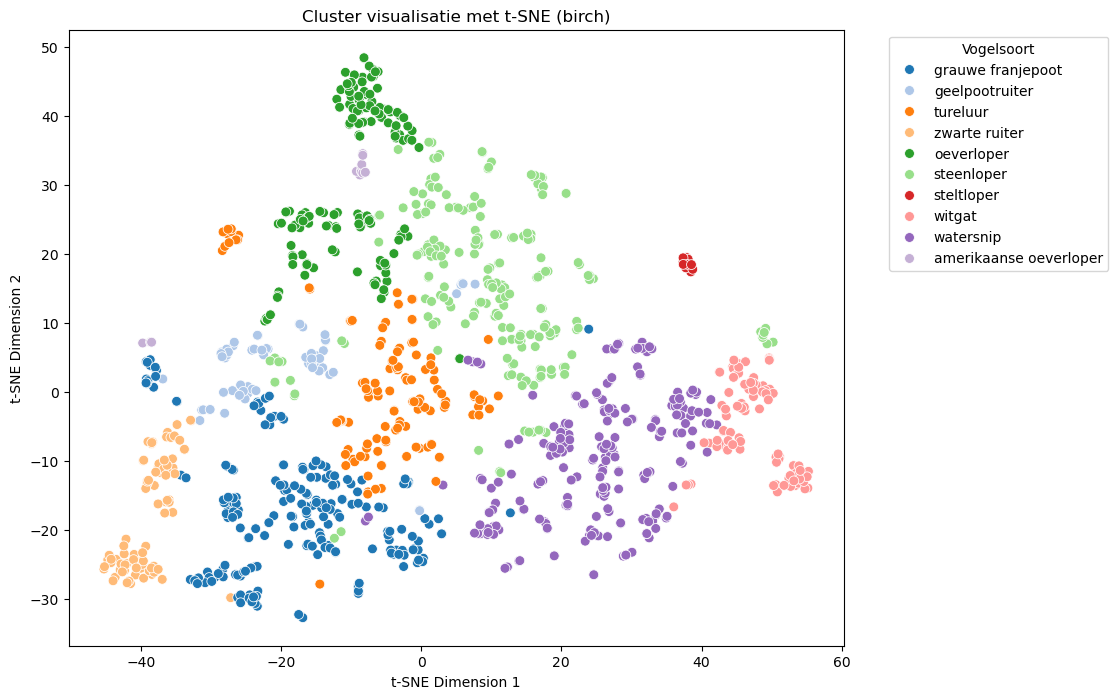

In [307]:
# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne_birch[:, 0], y=filtered_features_tsne_birch[:, 1], hue=filtered_species_labels_birch, palette='tab20', s=50)
plt.title("Cluster visualisatie met t-SNE (birch)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.show()

## Clustering: HDBSCAN

### Data Preparation

In [308]:
import hdbscan

# Pas HDBSCAN toe op de t-SNE features
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean')
hdbscan_labels = hdbscan_clusterer.fit_predict(features_tsne)

# Voeg de labels toe aan de dataset
species_labels_hdbscan = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in hdbscan_labels
]

### Modeling

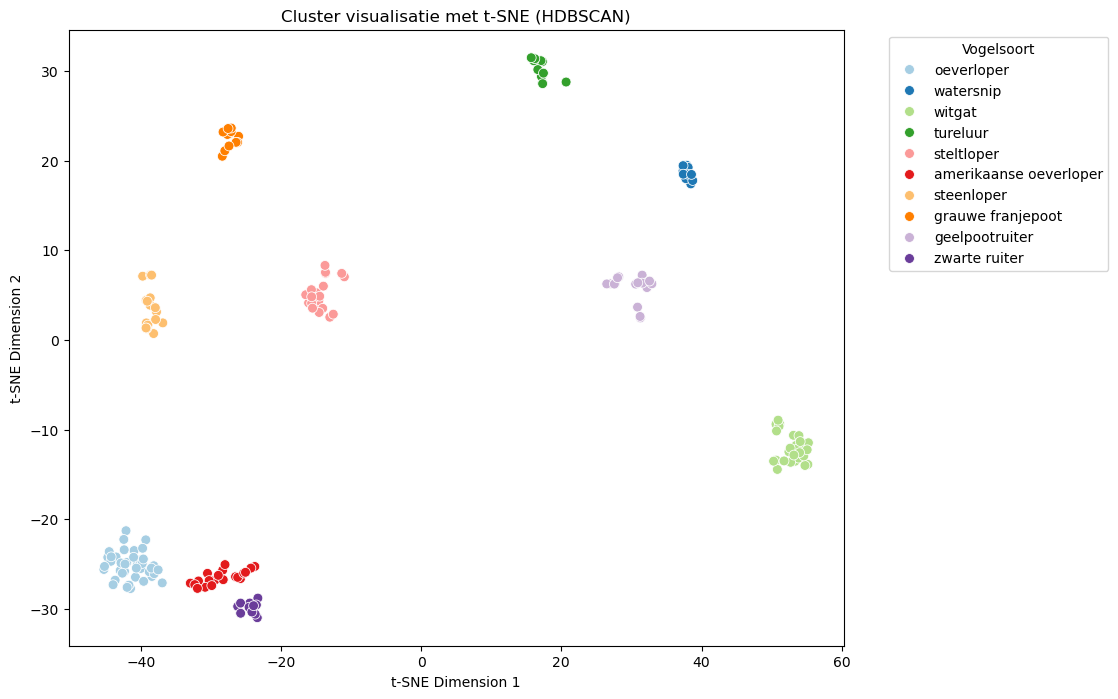

In [309]:
# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_hdbscan = [i for i, label in enumerate(species_labels_hdbscan) if label != 'Onbekend']
filtered_features_tsne_hdbscan = features_tsne[filtered_indices_hdbscan]
filtered_species_labels_hdbscan = [species_labels_hdbscan[i] for i in filtered_indices_hdbscan]

# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne_hdbscan[:, 0], y=filtered_features_tsne_hdbscan[:, 1], hue=filtered_species_labels_hdbscan, palette='Paired', s=50)
plt.title("Cluster visualisatie met t-SNE (HDBSCAN)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.show()

## Clustering: DBSCAN

### Data Preparation

In [310]:
from sklearn.cluster import DBSCAN

# Pas DBSCAN toe op de t-SNE features
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_tsne)

# Voeg de labels toe aan de dataset
species_labels_dbscan = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in dbscan_labels
]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_dbscan = [i for i, label in enumerate(species_labels_dbscan) if label != 'Onbekend']
filtered_features_tsne_dbscan = features_tsne[filtered_indices_dbscan]
filtered_species_labels_dbscan = [species_labels_dbscan[i] for i in filtered_indices_dbscan]


### Modeling

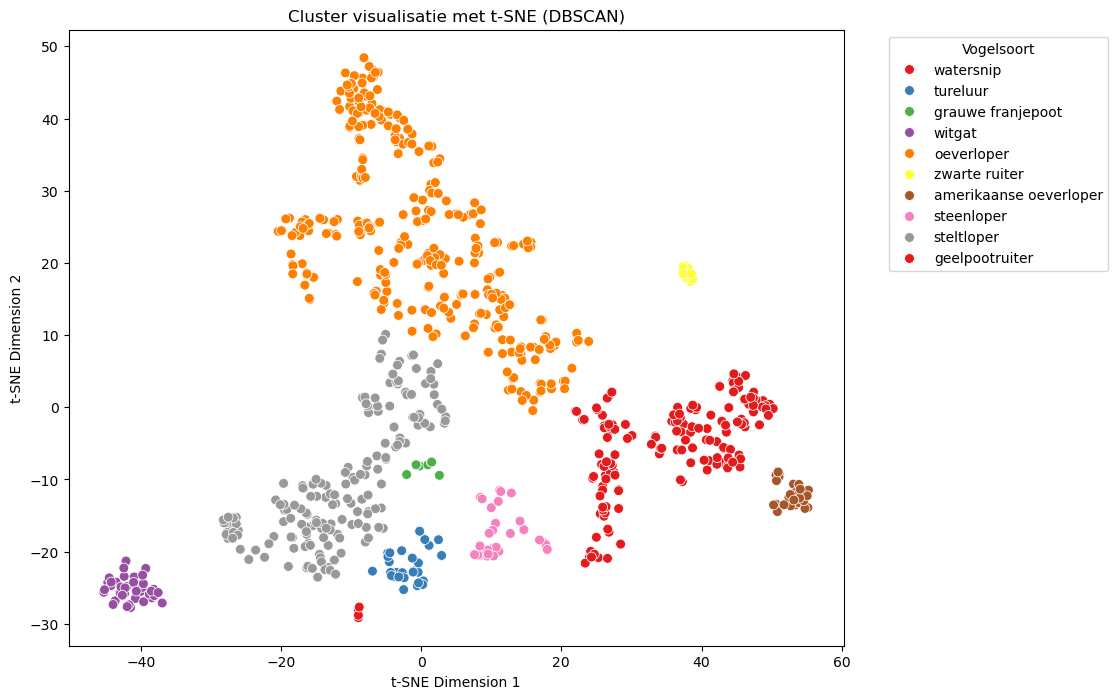

In [311]:
# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(x=filtered_features_tsne_dbscan[:, 0], y=filtered_features_tsne_dbscan[:, 1], hue=filtered_species_labels_dbscan, palette='Set1', s=50)
plt.title("Cluster visualisatie met t-SNE (DBSCAN)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.show()

## Clustering: Affinity Propagation

### Data Preparation

In [312]:
from sklearn.cluster import AffinityPropagation

In [313]:
# Pas Affinity clustering toe op de features
affinity = AffinityPropagation(random_state=42)
affinity_labels = affinity.fit_predict(features)

# Voeg de labels toe aan de dataset
# Map the Affinity cluster labels to the bird names using the test_data labels
# Voeg de labels toe aan de dataset
species_labels_affinity = [
    test_data.loc[test_data['label_numeric'] == label, 'labels'].iloc[0]
    if label in test_data['label_numeric'].values else 'Onbekend'
    for label in affinity_labels
]

# Filter de gegevens om "Onbekend" te verwijderen
filtered_indices_affinity = [i for i, label in enumerate(species_labels_affinity) if label != 'Onbekend']
filtered_features_tsne_affinity = features_tsne[filtered_indices_affinity]
filtered_species_labels_affinity = [species_labels_affinity[i] for i in filtered_indices_affinity]

### Modeling

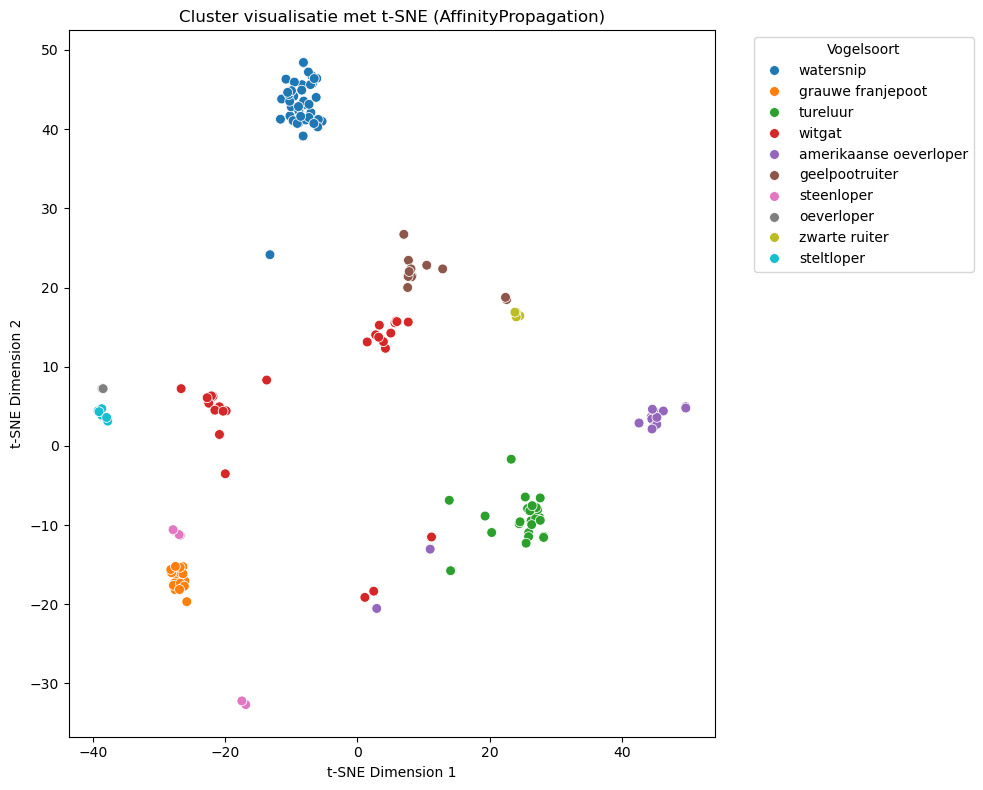

In [314]:
# Plot de clusters zonder "Onbekend"
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=filtered_features_tsne_affinity[:, 0],
    y=filtered_features_tsne_affinity[:, 1],
    hue=filtered_species_labels_affinity,
    palette='tab10',
    s=50
)
plt.title("Cluster visualisatie met t-SNE (AffinityPropagation)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

## Clustering: Agglomerative Hierarchical Clustering

### Data Preparation

In [315]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

#### Spectrale Features

In [316]:
# Setup lists
spectro_features = []
file_names = []
labels = []

for idx, row in test_data.iterrows():
    file_path = os.path.join("audio_fragments", row['fragment'])

    try:
        y, sr = librosa.load(file_path, sr=None)

        # Compute spectrogram (STFT)
        D = librosa.stft(y, n_fft=1024, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

        # Take mean energy per frequency bin (over time axis)
        spec_mean = np.mean(S_db, axis=1)

        spectro_features.append(spec_mean)
        file_names.append(row['fragment'])
        labels.append(row['labels'])

    except Exception as e:
        print(f"Fout bij laden van {row['fragment']}: {e}")

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=974
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=360
  warnings.warn(


In [317]:
max_len = max([len(f) for f in spectro_features])
spectro_features = [np.pad(f, (0, max_len - len(f)), mode='constant') for f in spectro_features]

# Make a DataFrame
feature_df = pd.DataFrame(spectro_features)
feature_df['fragment'] = file_names
feature_df['label'] = labels

print(feature_df.columns)

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,
       ...
              505,        506,        507,        508,        509,        510,
              511,        512, 'fragment',    'label'],
      dtype='object', length=515)


In [318]:
# Drop non-feature columns
X = feature_df.drop(columns=['fragment', 'label'])

# Schalen
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linkage
linked = linkage(X_scaled, method='ward')

#### Alle Features

In [319]:
combined_features = []
file_names_2 = []
labels_2 = []

for idx, row in test_data.iterrows():
    file_path = os.path.join("audio_fragments", row['fragment'])

    try:
        y, sr = librosa.load(file_path, sr=None)

        # --- MFCC ---
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)

        # --- Spectrogram ---
        D = librosa.stft(y, n_fft=1024, hop_length=512)
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        spec_mean = np.mean(S_db, axis=1)
        spec_mean = spec_mean[:50]  # Truncate for consistency (optional)

       # --- Chroma ---
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)
        
    # Combine everything
        features = np.concatenate([
            mfcc_mean,
            spec_mean,
            chroma_mean,
        ])

        combined_features.append(features)
        file_names_2.append(row['fragment'])
        labels_2.append(row['labels'])

    except Exception as e:
        print(f"Fout bij laden van {row['fragment']}: {e}")

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\

In [320]:
max_len_combi = max([len(f) for f in combined_features])
spectro_features_combi = [np.pad(f, (0, max_len_combi - len(f)), mode='constant') for f in combined_features]

# Make a DataFrame
feature_df_2 = pd.DataFrame(spectro_features_combi)
feature_df_2['fragment'] = file_names_2
feature_df_2['label'] = labels_2

print(feature_df_2.columns)

Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,         17,
               18,         19,         20,         21,         22,         23,
               24,         25,         26,         27,         28,         29,
               30,         31,         32,         33,         34,         35,
               36,         37,         38,         39,         40,         41,
               42,         43,         44,         45,         46,         47,
               48,         49,         50,         51,         52,         53,
               54,         55,         56,         57,         58,         59,
               60,         61,         62,         63,         64,         65,
               66,         67,         68,         69,         70,         71,
               72,         73,         74, 'fragment

In [321]:
# Drop non-feature columns
X_2 = feature_df_2.drop(columns=['fragment', 'label'])

# Schalen
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X_2)

# Linkage
linked_2 = linkage(X_scaled_2, method='ward')

#### Alleen MFCC

In [322]:
mfcc_features = []
file_names_3 = []
labels_3 = []

for idx, row in test_data.iterrows():
    file_path = os.path.join("audio_fragments", row['fragment'])
    
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)  # Average over time

        mfcc_features.append(mfcc_mean)
        file_names_3.append(row['fragment'])
        labels_3.append(row['labels'])
    
    except Exception as e:
        print(f"Fout bij laden van {row['fragment']}: {e}")


feature_df_3 = pd.DataFrame(mfcc_features)
feature_df_3['fragment'] = file_names_3
feature_df_3['label'] = labels_3

print(feature_df_3.columns)

c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1083
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=369
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=645
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=974
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1527
  warnings.warn(
c:\Users\madel\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=360
  warnings.warn(


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'fragment', 'label'], dtype='object')


In [323]:
# Prepare data for clustering
scaler_3 = StandardScaler()
X_scaled_3 = scaler_3.fit_transform(feature_df_3.drop(columns=['fragment', 'label']))

# Linkage for dendrogram
linked_3 = linkage(X_scaled_3, method='ward')

### Modeling

#### Spectrale Features

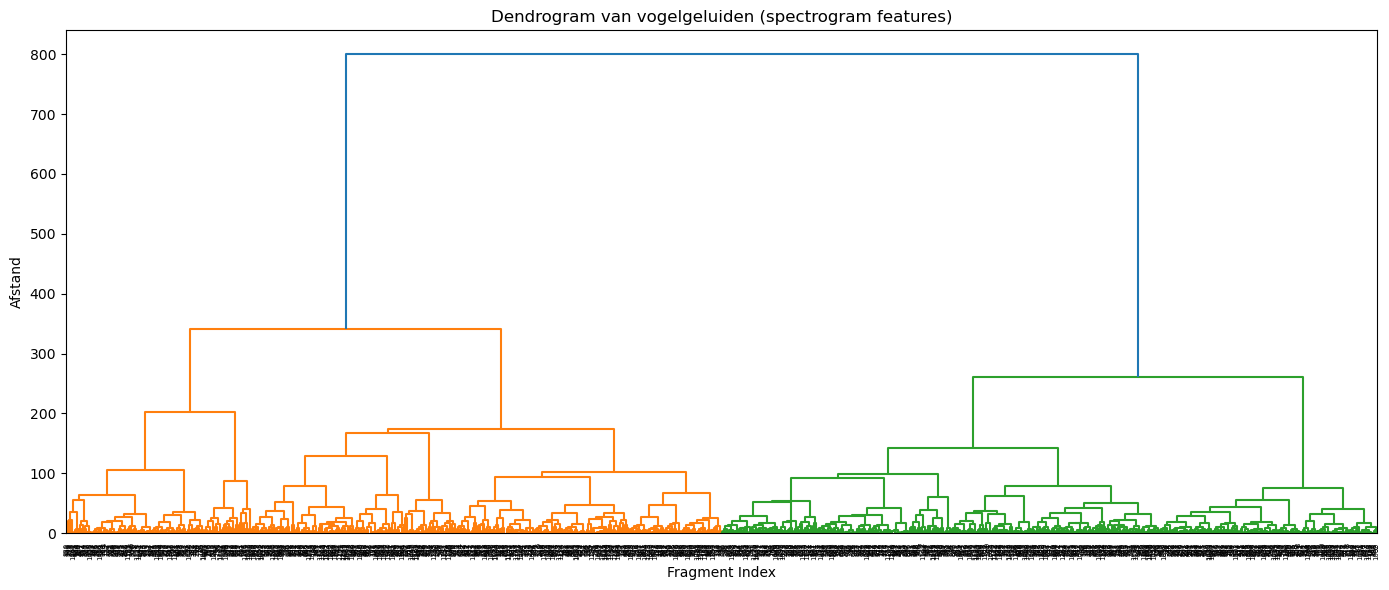

In [324]:
plt.figure(figsize=(14, 6))
dendrogram(linked, distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram van vogelgeluiden (spectrogram features)")
plt.xlabel("Fragment Index")
plt.ylabel("Afstand")
plt.tight_layout()
plt.show()

# Agglomerative clustering
n_clusters = 10  # kies op basis van dendrogram
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
feature_df['cluster'] = agglo.fit_predict(X_scaled)

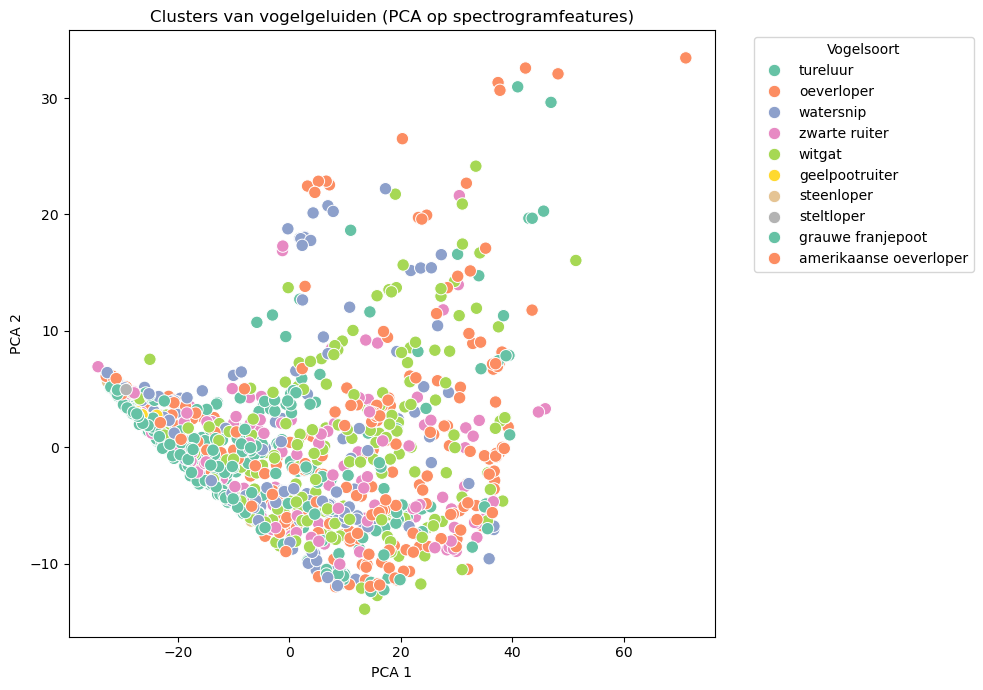

In [325]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=feature_df['label'], palette='Set2', s=80)
plt.title("Clusters van vogelgeluiden (PCA op spectrogramfeatures)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.tight_layout()
plt.show()

##### Conclusie

Hieruit blijkt dat de agglomerative hierarchy clustering niet goed werkt voor onze casus, gezien de clusters niet goed genoeg gescheiden zijn van elkaar. Bij deze is alleen de spectrogram gebruikt wat niet voor duidelijke resultaten zorgt.

#### Alle Features

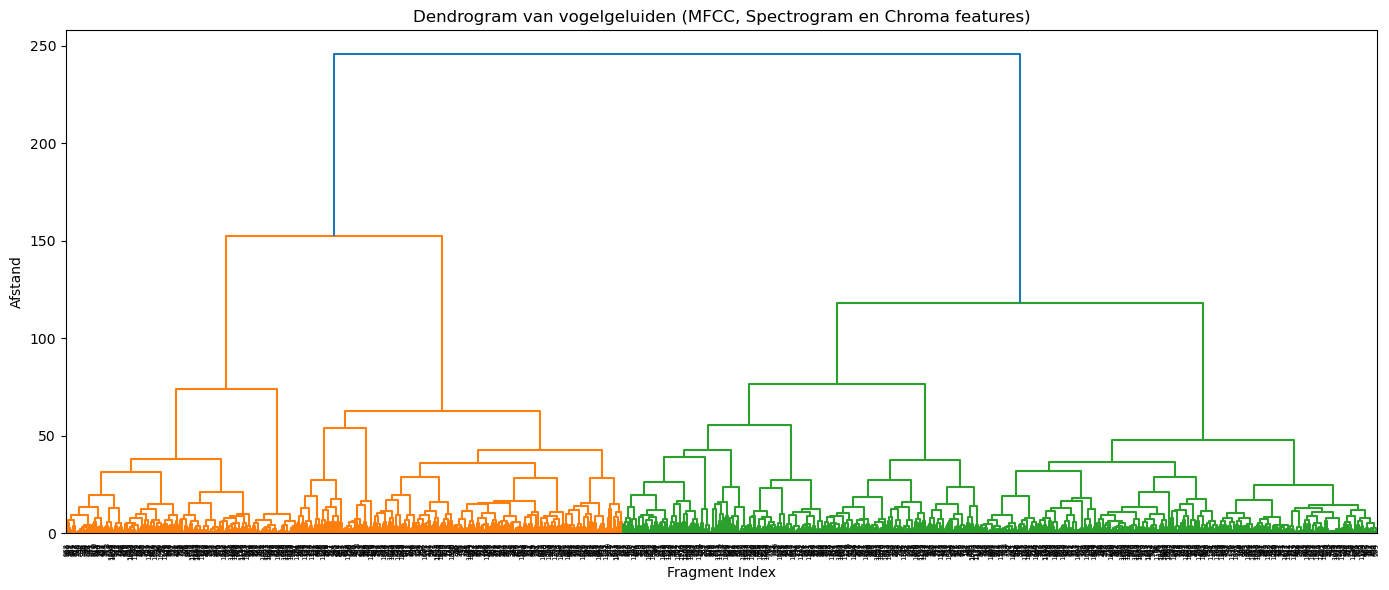

In [326]:
plt.figure(figsize=(14, 6))
dendrogram(linked_2, distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram van vogelgeluiden (MFCC, Spectrogram en Chroma features)")
plt.xlabel("Fragment Index")
plt.ylabel("Afstand")
plt.tight_layout()
plt.show()

# Agglomerative clustering
n_clusters = 10  # kies op basis van dendrogram
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
feature_df_2['cluster'] = agglo.fit_predict(X_scaled)


In [327]:
n_clusters = 10

agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agglo.fit_predict(X_scaled_2)

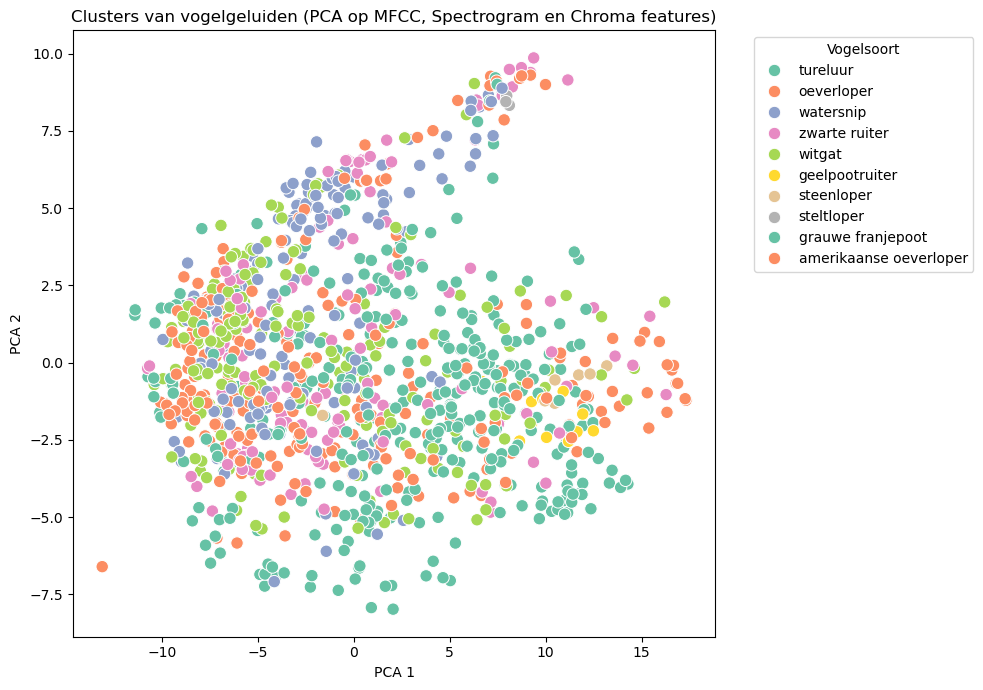

In [328]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_2)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=feature_df_2['label'], palette='Set2', s=80)
plt.title("Clusters van vogelgeluiden (PCA op MFCC, Spectrogram en Chroma features)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.tight_layout()
plt.show()

##### Conclusie

Hieruit blijkt dat de agglomerative hierarchy clustering niet goed werkt voor onze casus, gezien de clusters niet goed genoeg gescheiden zijn van elkaar. Hier zijn een hele hoop feature-extractie methodes gebruikt, maar ook hier komen geen duidelijke resultaten uit.

#### Alleen MFCC

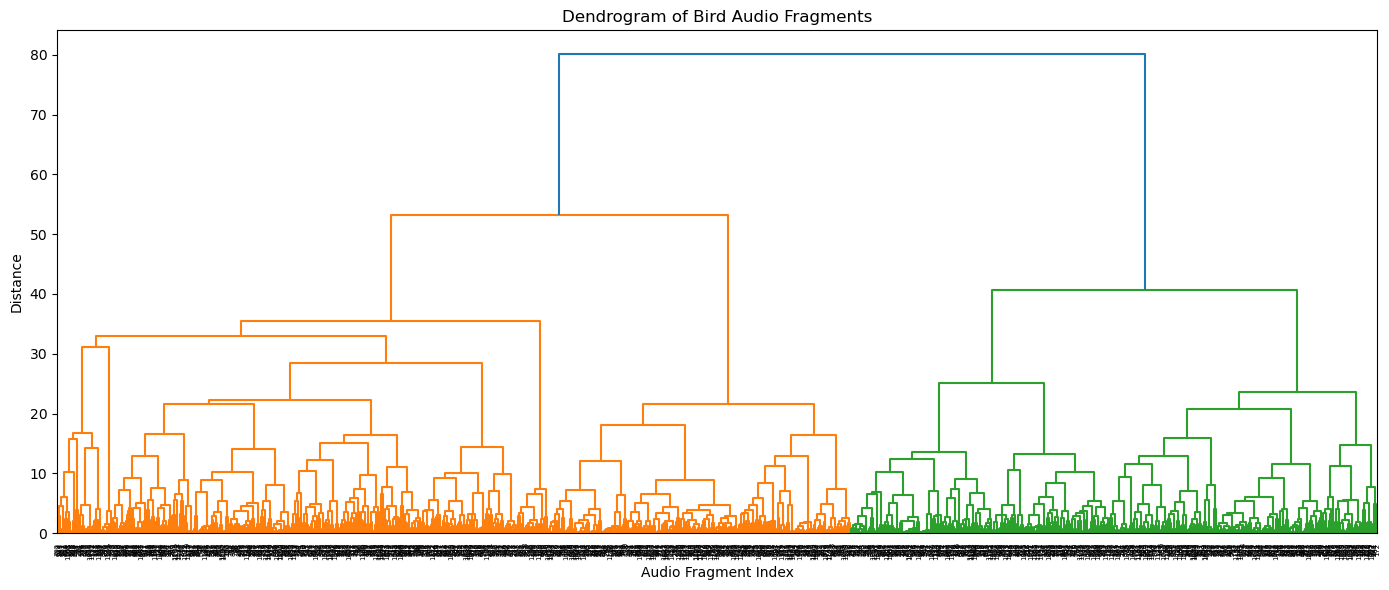

In [329]:
# Dendrogram
plt.figure(figsize=(14, 6))
dendrogram(linked_3, distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram of Bird Audio Fragments")
plt.xlabel("Audio Fragment Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [330]:
n_clusters = 10

agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agglo.fit_predict(X_scaled_3)

print(feature_df_3.columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'fragment', 'label'], dtype='object')


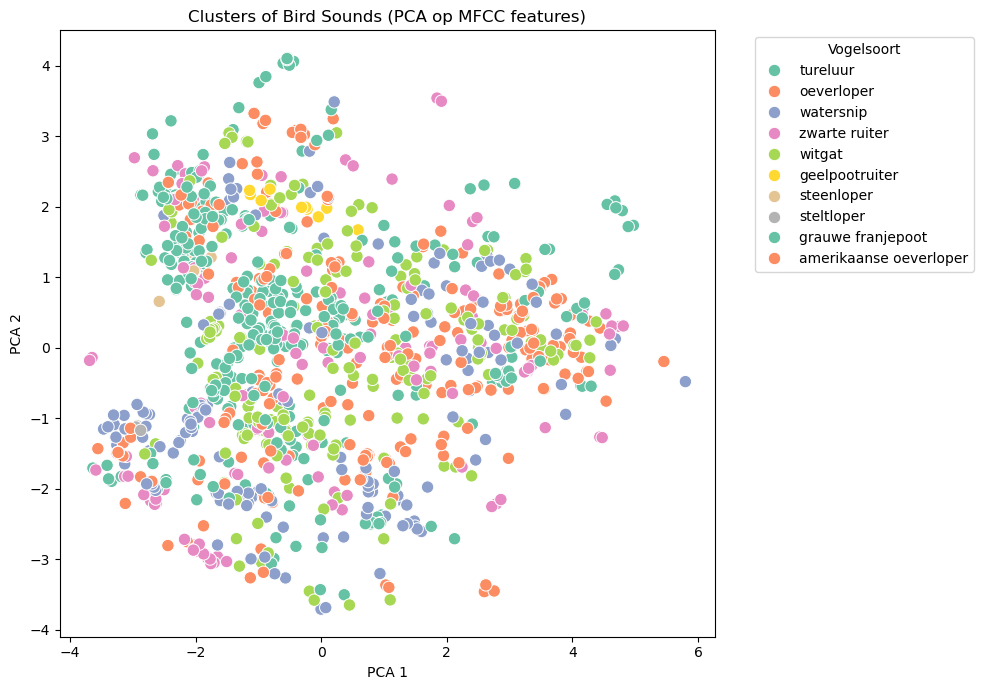

In [ ]:
# Add cluster labels to the dataframe
feature_df_3['cluster'] = cluster_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_3)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=feature_df_3['label'], palette='Set2', s=80)
plt.title("Clusters of Bird Sounds (PCA op MFCC features)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(
    title="Vogelsoort",
    bbox_to_anchor=(1.05, 1),   # Position legend outside the plot
    loc='upper left'
)
plt.tight_layout()
plt.show()


##### Conclusie
Hierbij is alleen de MFCC toegepast, ook hier komen geen duidelijke resultaten uit

## Evaluation

HDBSCAN werkt het beste op onze dataset .......

# Modeling

# Evaluation

# Deployment